In [ ]:
!nvidia-smi

Fri Dec  6 13:10:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JMeJsgzs4ayPIFhVTiFG")
project = rf.workspace("unig03").project("fish-quality-grading")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish-Quality-Grading-3 in yolov11:: 100%|██████████| 436/436 [00:00<00:00, 3187.54it/s]


**Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/Fish-Quality-Grading-3/data.yaml epochs=80 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 183MB/s]
Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Fish-Quality-Grading-3/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

**View Training Results**


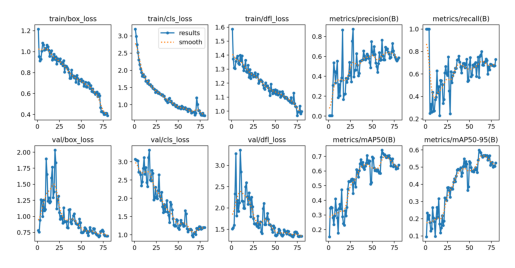

In [ ]:
# prompt: display results png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'path/to/your/results.png' with the actual path to your results image
image_path = '/content/runs/detect/train/results.png'

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


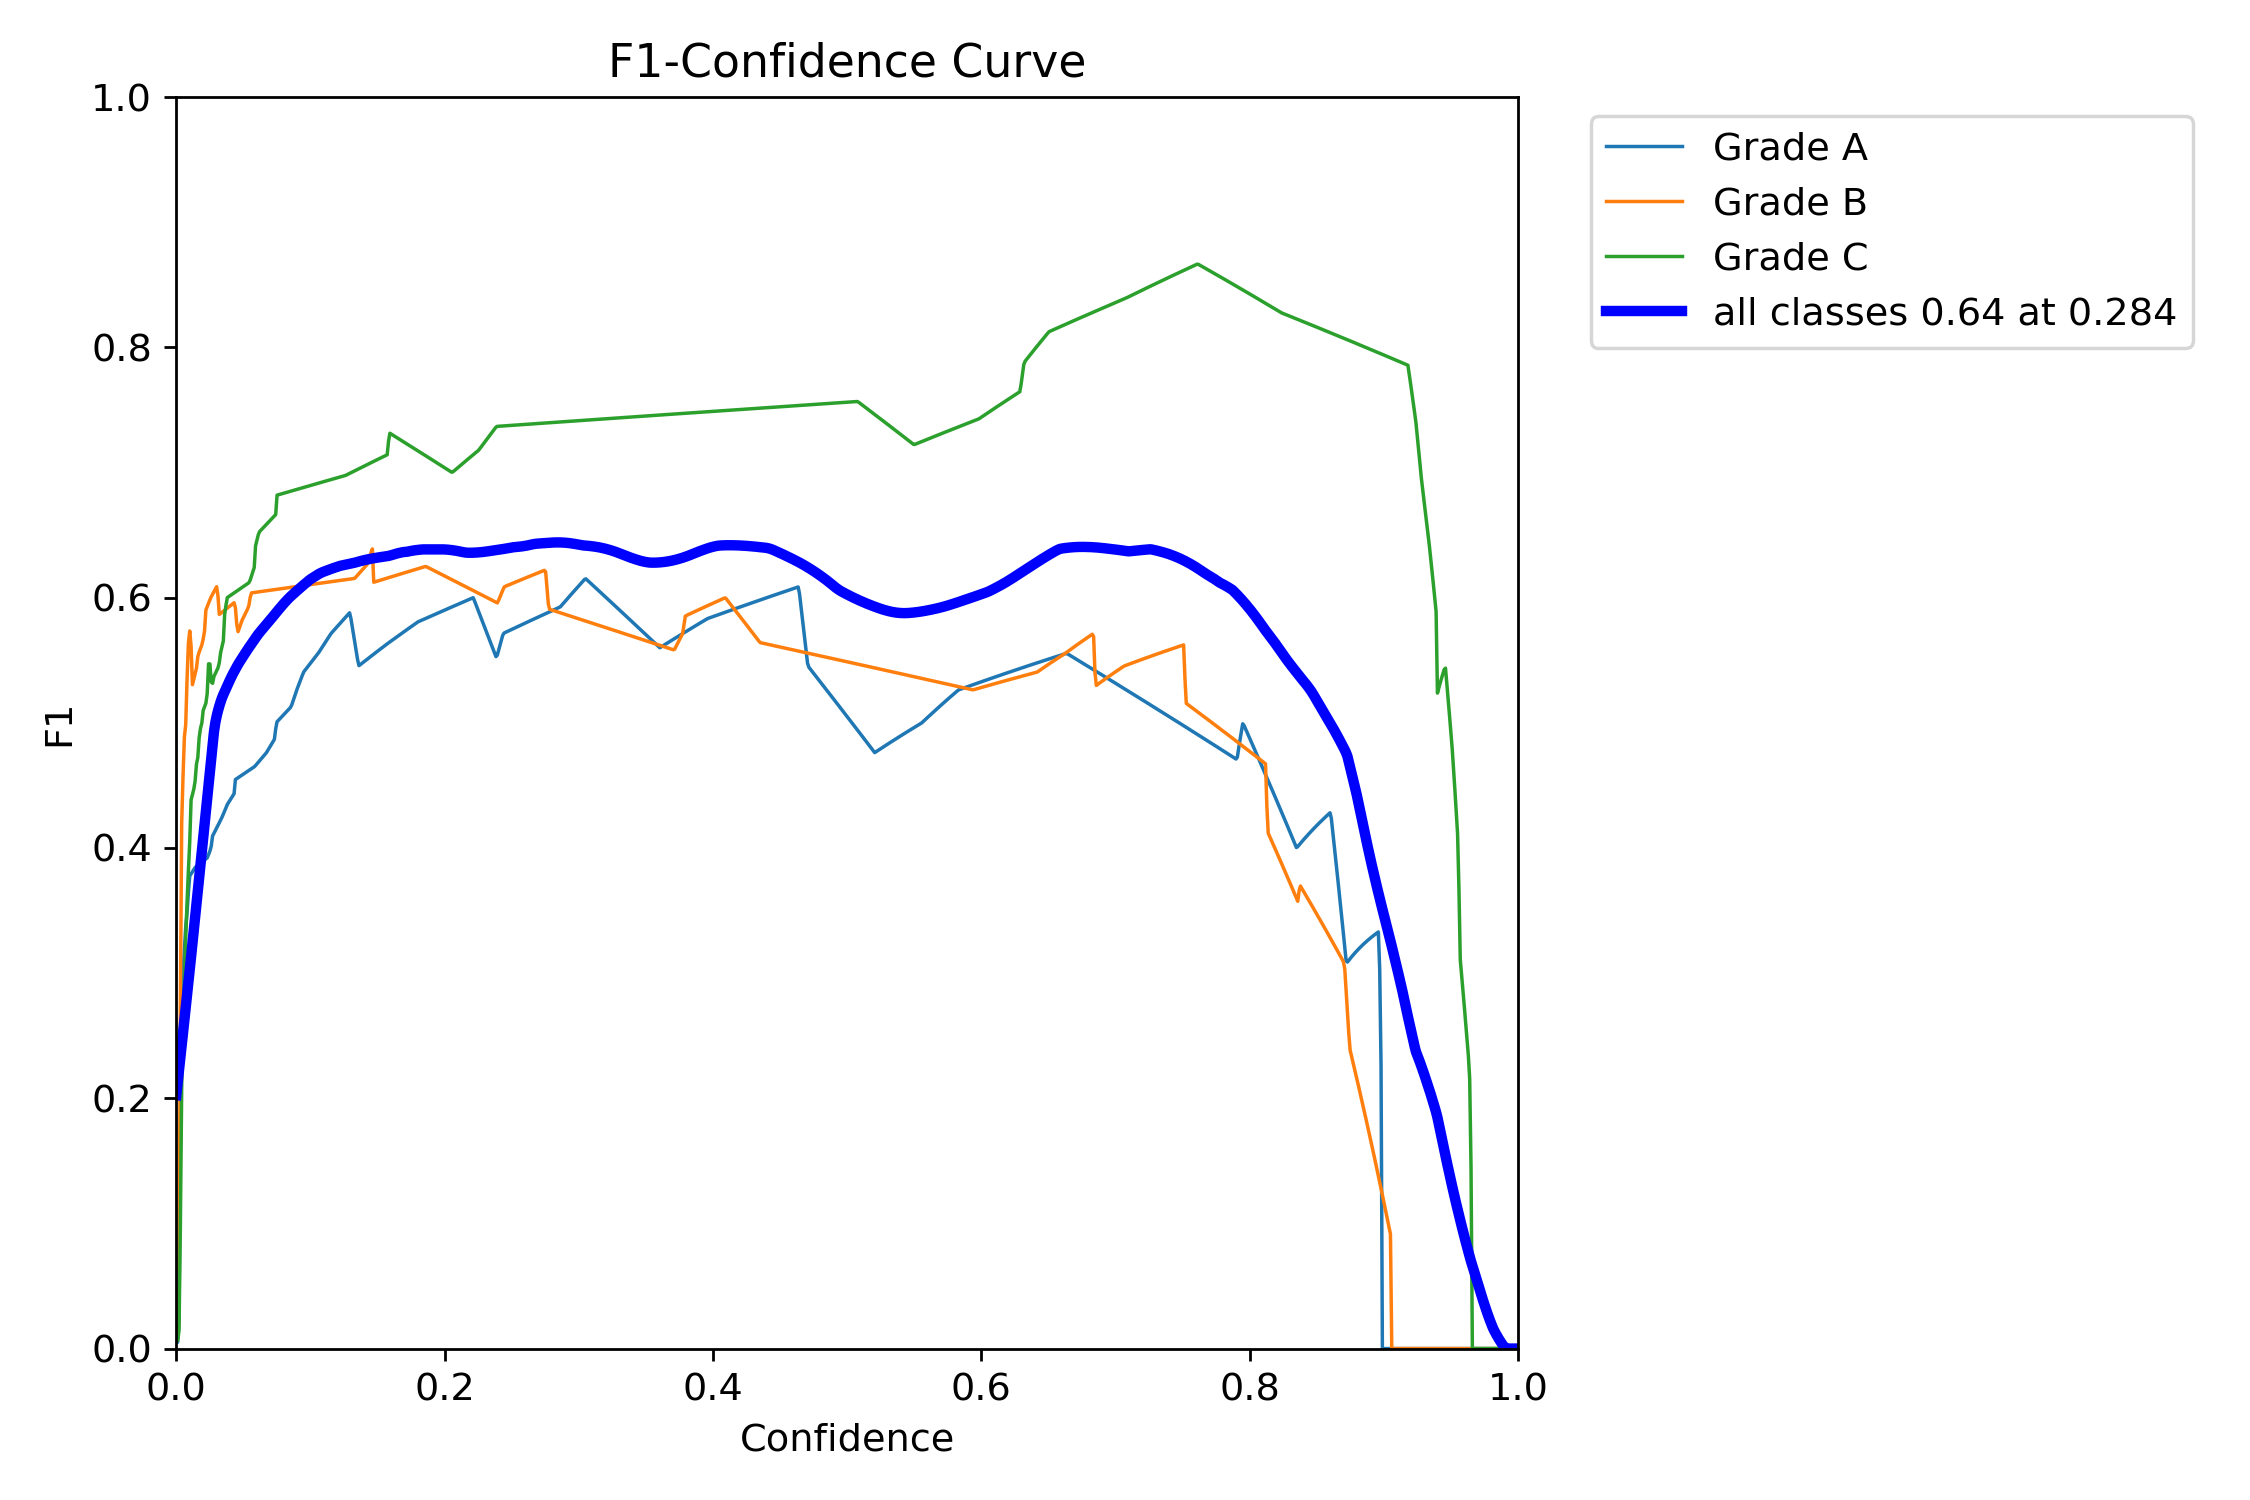

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/train/F1_curve.png', width=600))

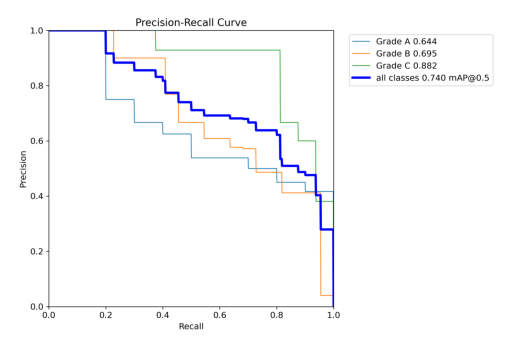

In [ ]:
# prompt: display PR_curve

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

# Replace 'path/to/your/PR_curve.png' with the actual path to your PR curve image
image_path = '/content/runs/detect/train/PR_curve.png'

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

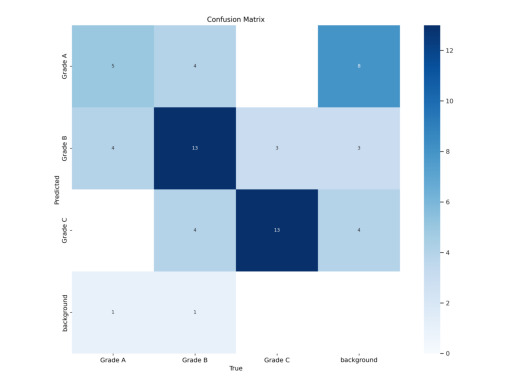

In [ ]:
# prompt: show confusion matrix

# Replace 'path/to/your/confusion_matrix.png' with the actual path to your confusion matrix image
image_path = '/content/runs/detect/train/confusion_matrix.png'

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

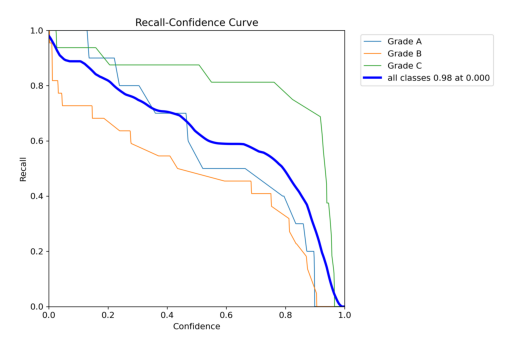

In [ ]:
# prompt: R curve

# Replace 'path/to/your/R_curve.png' with the actual path to your R curve image
image_path = '/content/runs/detect/train/R_curve.png'

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

**Validate Fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Fish-Quality-Grading-3/data.yaml

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Fish-Quality-Grading-3/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.62it/s]
                   all         41         48      0.511      0.819      0.677      0.543
               Grade A          9         10      0.422        0.9       0.53      0.366
               Grade B         16         22      0.545      0.682       0.63      0.474
               Grade C         16         16      0.565      0.875      0.872      0.789
Speed: 5.3ms preprocess, 14.5ms inference, 0.0ms loss, 13.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Fish-Quality-Grading-3/test/images save=True

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/21 /content/Fish-Quality-Grading-3/test/images/106_jpg.rf.0198b9310970e7b49510a593cb3aefb5.jpg: 288x640 1 Grade B, 49.9ms
image 2/21 /content/Fish-Quality-Grading-3/test/images/113_jpg.rf.b0330cdc7c72a7ef7c74d049d7be275f.jpg: 480x640 7 Grade Cs, 64.4ms
image 3/21 /content/Fish-Quality-Grading-3/test/images/19_jpg.rf.46b427488e32add26920d71d4d7b1e38.jpg: 512x640 1 Grade B, 64.4ms
image 4/21 /content/Fish-Quality-Grading-3/test/images/2_jpg.rf.a4ba79fb19deb7c915ef2370cb8e0876.jpg: 320x640 1 Grade B, 64.6ms
image 5/21 /content/Fish-Quality-Grading-3/test/images/35_jpg.rf.1bdcbf97b3d0440d280a6af7e859a913.jpg: 288x640 1 Grade B, 10.8ms
image 6/21 /content/Fish-Quality-Grading-3/test/images/56_jpg.rf.f6b2838e6f60dd4a1a36e30eb83523ac.jpg: 480x640 2 Grade Bs, 10.8ms
image 7/21 /content/Fish-Quality-Grading-3/test/images/60

**Inference with Custom model**

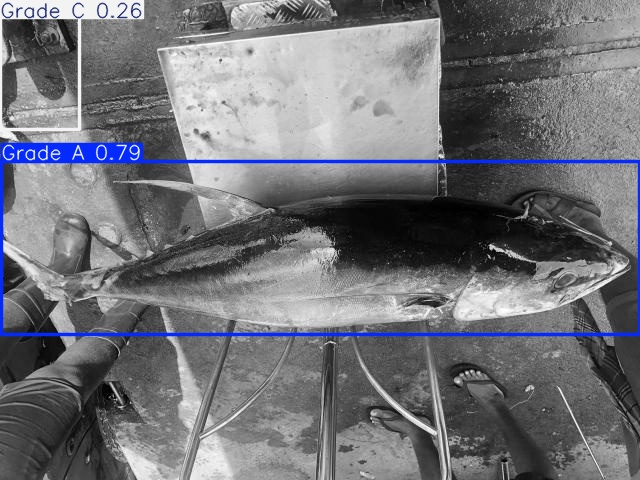

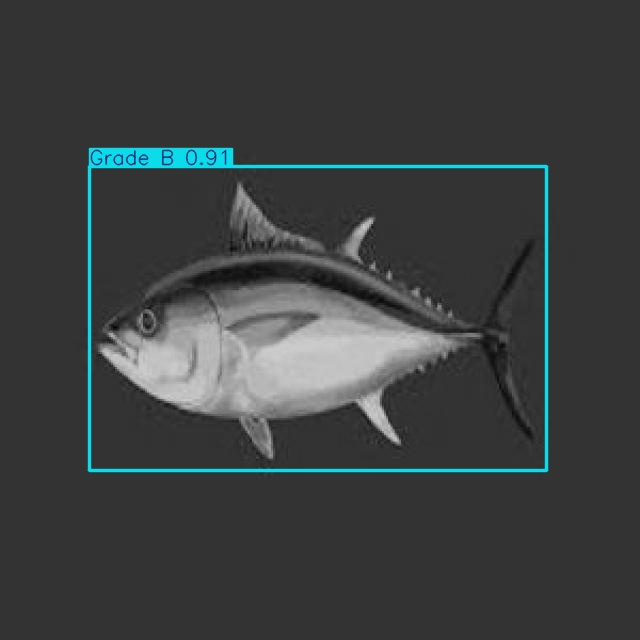

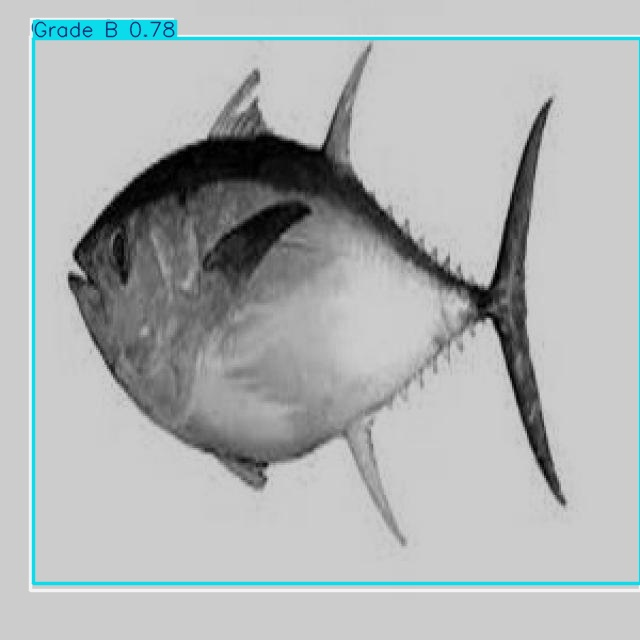

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**Diploy Roboflow**

In [ ]:
# prompt: deploy model on roboflow

# **Deploy to Roboflow**
!yolo task=detect mode=export model=/content/runs/detect/train/weights/best.pt format=onnx

# The exported model will be in /content/runs/detect/train/weights/
# You can now upload this model to Roboflow for deployment.
# Refer to Roboflow documentation for detailed instructions on how to deploy.

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 1.4s, saved as '/content/runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (1.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/content/Fish-Quality-Grading-3/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


In [ ]:
rf = Roboflow(api_key="JMeJsgzs4ayPIFhVTiFG") # Replace with your actual API key


image 1/1 /content/Fish-Quality-Grading-3/test/images/WhatsApp-Image-2024-11-22-at-11-14-01-AM_jpeg.rf.2e84c01535ce0c535364d96908c5ce6b.jpg: 480x640 3 Grade As, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


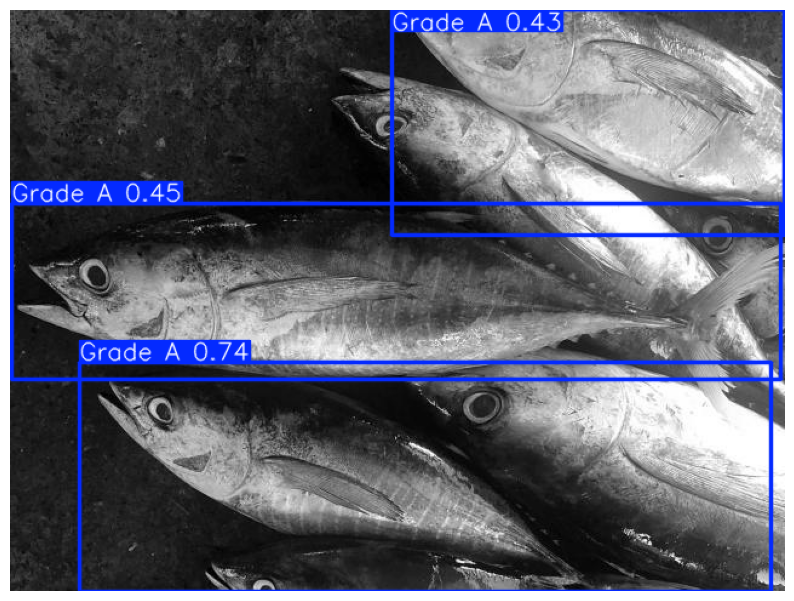

Box: tensor([ 57.0930, 291.2970, 628.3775, 480.0000], device='cuda:0')
Class Label: Grade A
Confidence: 0.74
---
Box: tensor([  1.7571, 160.5486, 636.4166, 305.3894], device='cuda:0')
Class Label: Grade A
Confidence: 0.45
---
Box: tensor([3.1541e+02, 8.3237e-02, 6.3927e+02, 1.8682e+02], device='cuda:0')
Class Label: Grade A
Confidence: 0.43
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/56_jpg.rf.f6b2838e6f60dd4a1a36e30eb83523ac.jpg: 480x640 2 Grade Bs, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Box: tensor([  1.2758, 138.2278, 617.2140, 354.1372], device='cuda:0')
Class Label: Grade B
Confidence: 0.77
---
Box: tensor([  1.6415, 362.5229, 386.3046, 479.7311], device='cuda:0')
Class Label: Grade B
Confidence: 0.31
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/images-13-_newt_jpg.rf.c99f2431d2866c162e08e921f29fe461.jpg: 640x640 1 Grade B, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Box: tensor([ 89.2058, 166.1899, 546.7283, 470.6804], device='cuda:0')
Class Label: Grade B
Confidence: 0.91
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/94_jpg.rf.9c8d563dcb7ab0614a7bb3d17bec45d1.jpg: 288x640 1 Grade C, 14.0ms
Speed: 1.1ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


Box: tensor([ 16.9697,   7.9196, 637.0434, 226.1546], device='cuda:0')
Class Label: Grade C
Confidence: 0.97
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/i-12-_newt_jpg.rf.c8df3849ec25ba7eed97dad85f158074.jpg: 640x640 1 Grade A, 2 Grade Bs, 1 Grade C, 16.1ms
Speed: 2.3ms preprocess, 16.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


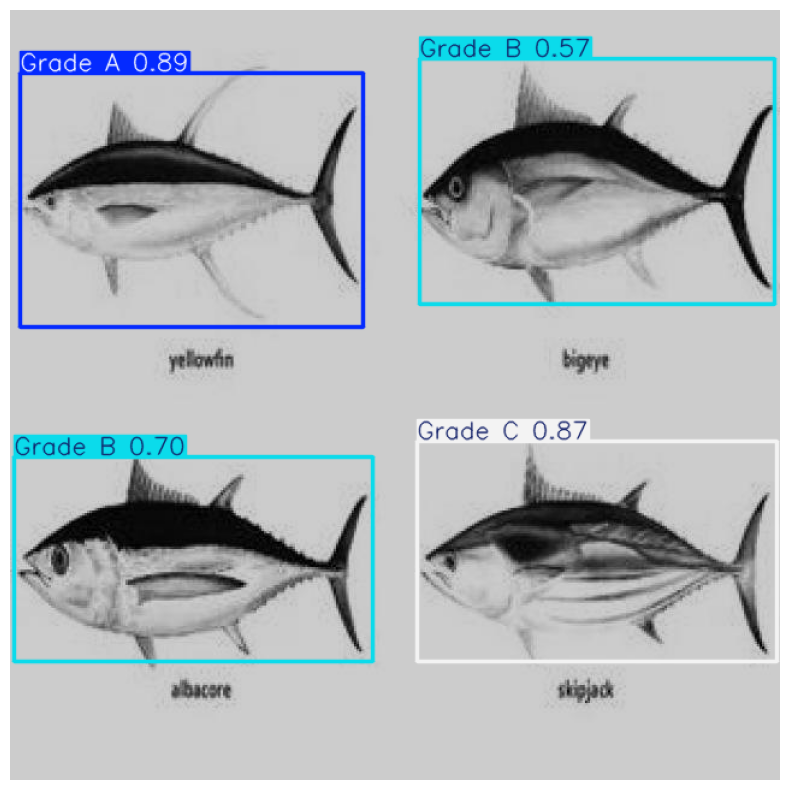

Box: tensor([  8.2349,  52.7464, 293.6091, 263.2910], device='cuda:0')
Class Label: Grade A
Confidence: 0.89
---
Box: tensor([338.6477, 358.2164, 637.2834, 541.4006], device='cuda:0')
Class Label: Grade C
Confidence: 0.87
---
Box: tensor([  3.9760, 371.6719, 301.0309, 541.4307], device='cuda:0')
Class Label: Grade B
Confidence: 0.70
---
Box: tensor([340.9861,  40.5854, 635.5867, 244.9500], device='cuda:0')
Class Label: Grade B
Confidence: 0.57
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/113_jpg.rf.b0330cdc7c72a7ef7c74d049d7be275f.jpg: 480x640 7 Grade Cs, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


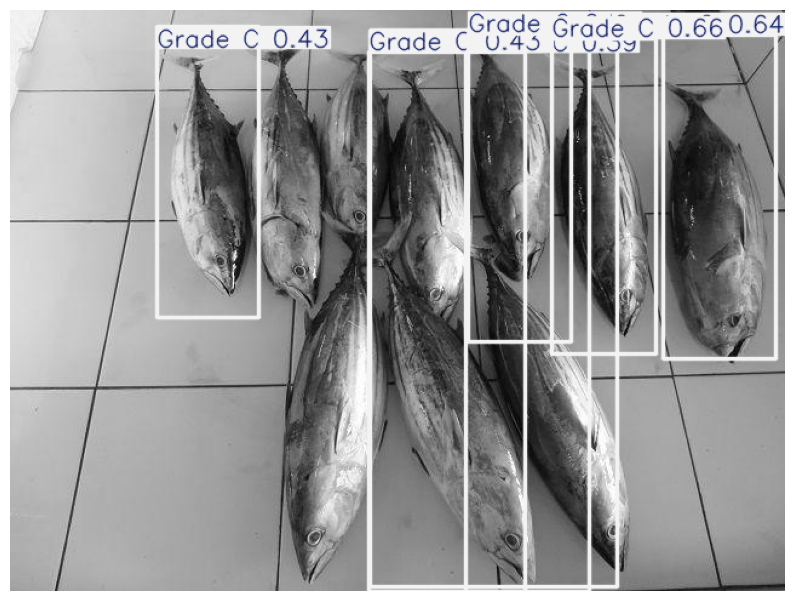

Box: tensor([447.7693,  24.0406, 533.1844, 284.7824], device='cuda:0')
Class Label: Grade C
Confidence: 0.66
---
Box: tensor([539.3198,  21.1301, 632.4492, 288.4718], device='cuda:0')
Class Label: Grade C
Confidence: 0.64
---
Box: tensor([378.2886,  20.7513, 463.0867, 274.2104], device='cuda:0')
Class Label: Grade C
Confidence: 0.53
---
Box: tensor([121.1700,  14.1984, 205.6407, 254.5202], device='cuda:0')
Class Label: Grade C
Confidence: 0.43
---
Box: tensor([296.1033,  35.3485, 425.6998, 480.0000], device='cuda:0')
Class Label: Grade C
Confidence: 0.43
---
Box: tensor([376.0554,  17.1151, 478.9866, 480.0000], device='cuda:0')
Class Label: Grade C
Confidence: 0.39
---
Box: tensor([297.2990,  34.4535, 501.8174, 476.8411], device='cuda:0')
Class Label: Grade C
Confidence: 0.34
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/62_jpg.rf.9c4b9f1c4630b7cc5bd2d90fbba2c5b3.jpg: 480x640 1 Grade B, 11.1ms
Speed: 1.6ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shap

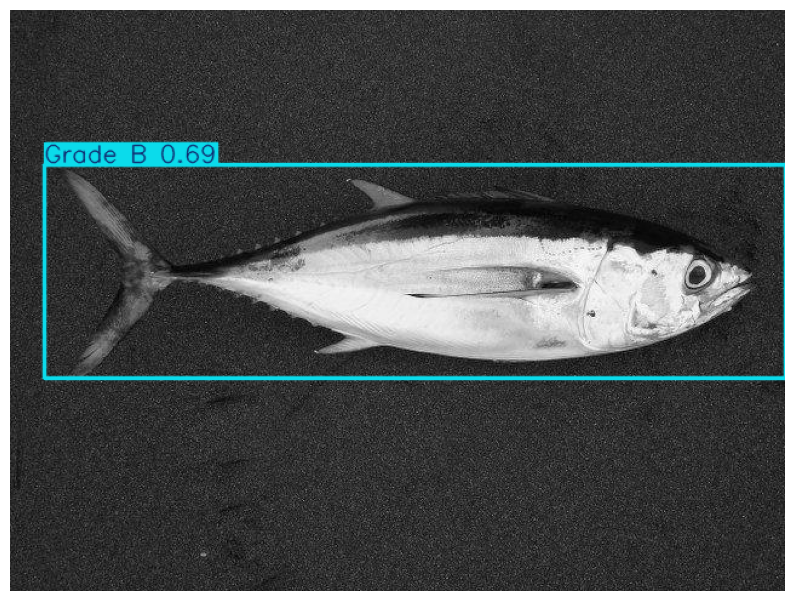

Box: tensor([ 28.1491, 128.1571, 640.0000, 304.4603], device='cuda:0')
Class Label: Grade B
Confidence: 0.69
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/91_jpg.rf.131f30a070edf4804bf4269b3a58a072.jpg: 320x640 1 Grade B, 16.3ms
Speed: 1.1ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


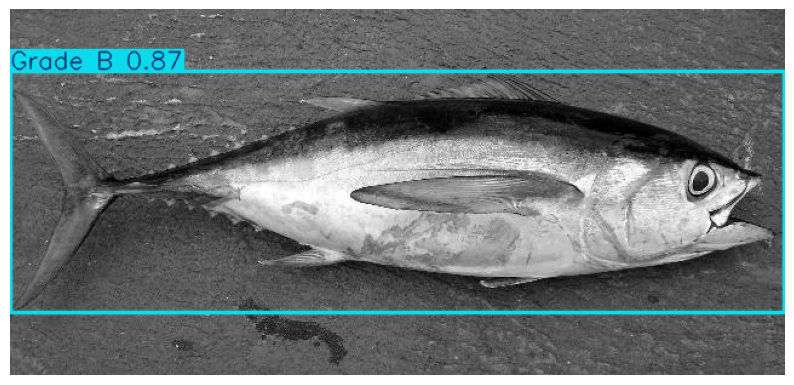

Box: tensor([  0.0000,  51.4966, 639.7836, 250.2945], device='cuda:0')
Class Label: Grade B
Confidence: 0.87
---



image 1/1 /content/Fish-Quality-Grading-3/test/images/97_jpg.rf.4238a82a916a32992eda4c499b031396.jpg: 288x640 1 Grade B, 13.2ms
Speed: 3.3ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)


Box: tensor([ 12.3773,  33.2184, 638.8541, 254.8851], device='cuda:0')
Class Label: Grade B
Confidence: 0.79
---




In [ ]:
# prompt: annote and label display in boxes

# ... (Your existing code)

# Load the trained model
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Specify the directory containing your test images
test_image_dir = '/content/Fish-Quality-Grading-3/test/images'  # Replace with the actual path

# Get a list of image files in the directory
image_files = glob.glob(os.path.join(test_image_dir, '*.jpg'))

# Select 4 random images for inference
selected_images = random.sample(image_files, 9)

# Perform inference and display annotated images
for image_path in selected_images:
    results = model(image_path)

    # Access the boxes, labels and confidence scores
    boxes = results[0].boxes.xyxy
    labels = results[0].boxes.cls
    confidences = results[0].boxes.conf

    # Annotate the image with bounding boxes, labels and confidences
    annotated_img = results[0].plot()

    # Display the annotated image using matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(annotated_img[:,:,::-1]) # convert BGR to RGB
    plt.axis('off')
    plt.show()


    # Print boxes, labels and confidence for each detection
    for box, label, confidence in zip(boxes, labels, confidences):
      print(f"Box: {box}")
      print(f"Class Label: {model.names[int(label)]}")
      print(f"Confidence: {confidence:.2f}")
      print("---")

    print("\n")